# Bayesian Regression & MLE for Student Performance Analysis

**Team member**: Hung Dinh - 19774520

**Theme**: Bayesian vs Frequentist Approach on Regression - Student Performance

**Github Repo**: https://github.com/hd54/stat447c

All commits are done by me and me only.

**Introduction**:

Performance have always been a concern for a lot of students regardless of education level, whether it be high school, university, or college. Good performance can mean greater opportunities for higher education, awards, and even jobs, so students want to be successful in their courses. However, there's always a disparity in students' performance, which can be seen in grade distributions of exams, homework, etc. It's possible that students' background or how they treat the class affect their performance. This project seeks to see how different factors contribute to students' performance (in particular, final exam score or course grade letter). The main goal would to be able to predict performance based on most influential predictors and explore its application.

**Dataset**:

My dataset is derived from https://www.kaggle.com/datasets/lainguyn123/student-performance-factors with the following attributes:

| Attribute                 | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| Hours_Studied            | Number of hours spent studying per week.                                   |
| Attendance               | Percentage of classes attended.                                             |
| Parental_Involvement     | Level of parental involvement in the student's education (Low, Medium, High). |
| Access_to_Resources      | Availability of educational resources (Low, Medium, High).                 |
| Extracurricular_Activities | Participation in extracurricular activities (Yes, No).                    |
| Sleep_Hours              | Average number of hours of sleep per night.                                 |
| Previous_Scores          | Scores from previous exams.                                                 |
| Motivation_Level         | Student's level of motivation (Low, Medium, High).                          |
| Internet_Access          | Availability of internet access (Yes, No).                                  |
| Tutoring_Sessions        | Number of tutoring sessions attended per month.                             |
| Family_Income            | Family income level (Low, Medium, High).                                    |
| Teacher_Quality          | Quality of the teachers (Low, Medium, High).                                |
| School_Type              | Type of school attended (Public, Private).                                  |
| Peer_Influence           | Influence of peers on academic performance (Positive, Neutral, Negative).   |
| Physical_Activity        | Average number of hours of physical activity per week.                      |
| Learning_Disabilities    | Presence of learning disabilities (Yes, No).                                |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate).    |
| Distance_from_Home       | Distance from home to school (Near, Moderate, Far).                         |
| Gender                   | Gender of the student (Male, Female).                                       |
| Exam_Score               | Final exam score.                                                           |

My response variable is exam score. The dataset contains 19 explantory variables, many of which are categorical variables so I can encode the data vector into multiple factors. 

**Concepts**:

I can start simple with a comparative study of different types of regression using frequentist and Bayesian approach. I can do a comparative study on traditional (without penalty) and regularized regression for each approach. For frequentist approach, I can start by optimizing the number of variables used for regression through removing collinearity (i.e. we can use forward selection along with VIF analysis). I would expect to see regularized model to perform at least as well on predicting data due to the extra penalty added.

For Bayesian approach, we can use hierarchical model. It happens that we can treat the regularizer term as a part of the prior, since it controls how much information we can learn from data, whereas frequentist approach will include an extra term as penalty value. I can also experiment with using different priors for discrete and continuous variables, whereas dummy variables can be used for frequentist paradigm as mentioned above.

References show that I can use a Laplace prior in response to frequentist LASSO regression, and a Normal prior for ridge regression which produces a similar performance across frequentist and Bayesian paradigm. However, Bayesian works better with limited data and in certain cases with a good choice of priors can provide better accuracy score. In contrast to the article in https://haines-lab.com/post/on-the-equivalency-between-the-lasso-ridge-regression-and-specific-bayesian-priors/, I suggest that there are certain scenarios where the Bayesian models outperform the frequentist models. The underlying reasons are in the number of data points usede for training and a good choice of prior.

According to the article above, Laplace and Normal priors can be shown to show similar effects as regularizers in frequentist models. I can build onto this existing model with a different choice of distribution on the likelihood.

The Bayesian regression model takes the form of:

$y_{i} | \beta_{0},\boldsymbol{x_{i}},\boldsymbol{\beta},\sigma \sim \mathcal{N}(\beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}, \sigma)$

which works well with the given dataset in the article. However, outlier is not a concern within this article and is something that I can improve on with the given student performance dataset. Using a t-distribution in this case is more preferable, since it's more robust to outliers. Along with this, I can use an additional uninformed Gamma prior on the degrees of freedom for the t-distribution to control the likelihood "tailedness" as suggested by the Stan community. So instead, I will use:

$y_{i} | \nu, \beta_{0},\boldsymbol{x_{i}},\boldsymbol{\beta},\sigma \sim \mathcal{t_\nu}(\nu, \beta_{0} + \sum_{j=1}^{p}x_{ij}\beta_{j}, \sigma)$

with a non-informative prior $\nu \sim \Gamma(2, 0.1)$, which is close to a penalized complexity prior, as stated by https://paulbuerkner.com/brms/reference/set_prior.html


## Modellings

In [7]:
suppressMessages(library("magick"))

#### Frequentist Approach

I carried out a forward stepwise linear regression analysis a 1% sample of the dataset (limited training data) to find the best model that minimized the Akaike Information Criterion (AIC).

The final model had 11 predictors:

- Attendance
- Hours_Studied
- Gender
- Parental_Education_Level
- Teacher_Quality
- Peer_Influence
- Tutoring_Sessions
- Motivation_Level
- Internet_Access
- Physical_Activity (an indicator of a healthy lifestyle) 
- Learning_Disabilities. 

Multicollinearity diagnostics through VIF analysis were carried out, indicating no concern with respect to potential collinearity among the predictors since VIF scores for all concerned variables are roughly 1. Note that correlation map is not very useful in this case due to the presence of categorical variables.

The exam scores are also roughly following a normal distribution

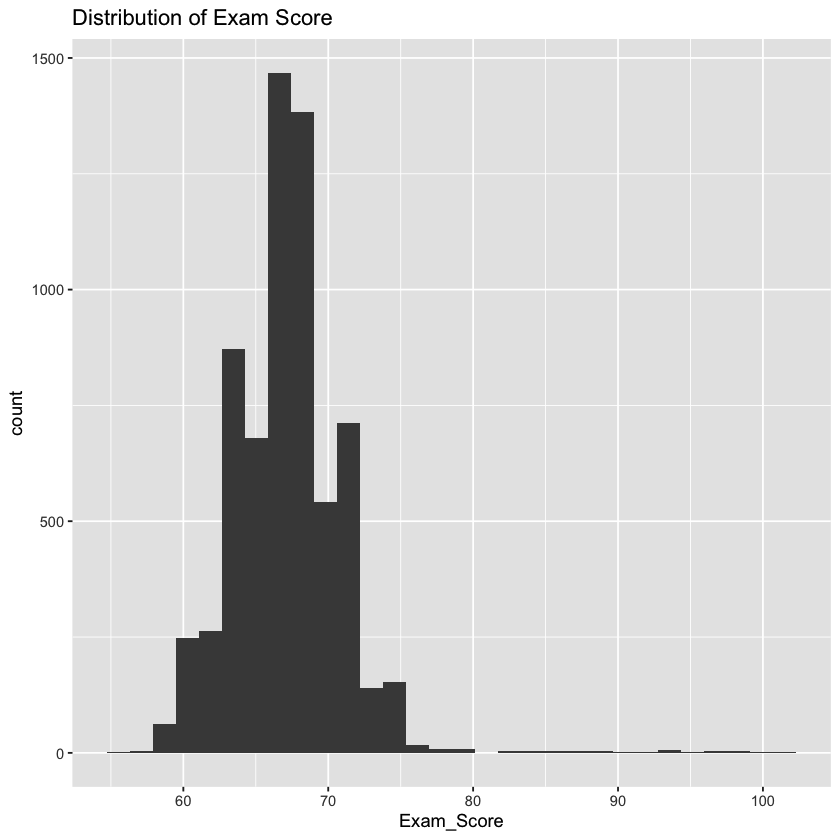

In [12]:
grid::grid.raster(magick::image_read("plot1.png"), width = grid::unit(1, "npc"), height = grid::unit(1, "npc"))


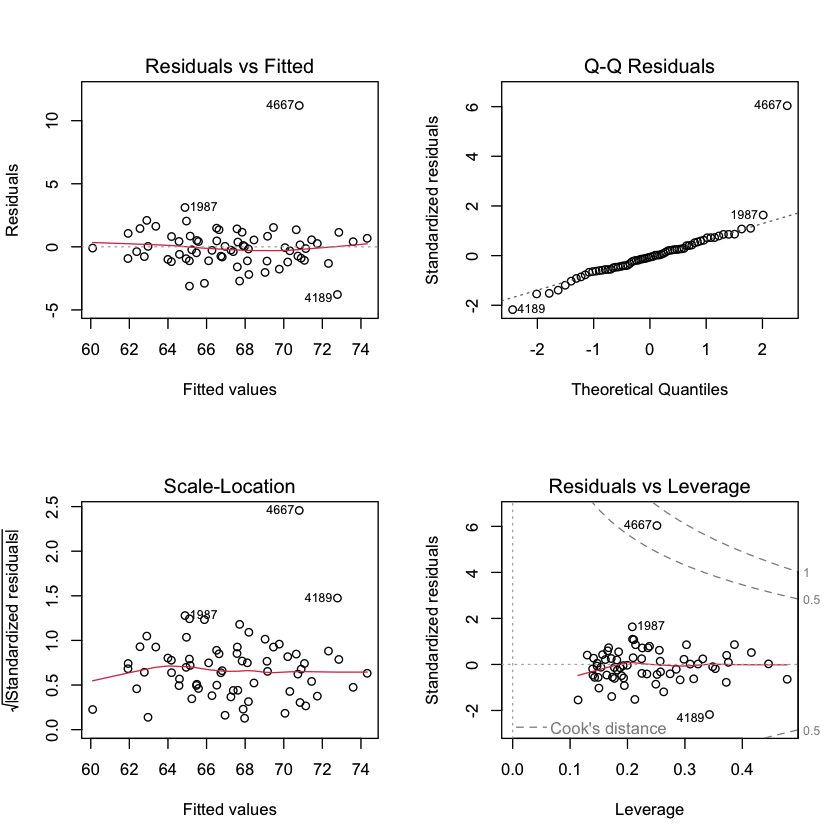

In [15]:
grid::grid.raster(magick::image_read("plot2.png"), width = grid::unit(1, "npc"), height = grid::unit(1, "npc"))

1. Traditional (no regularizer)

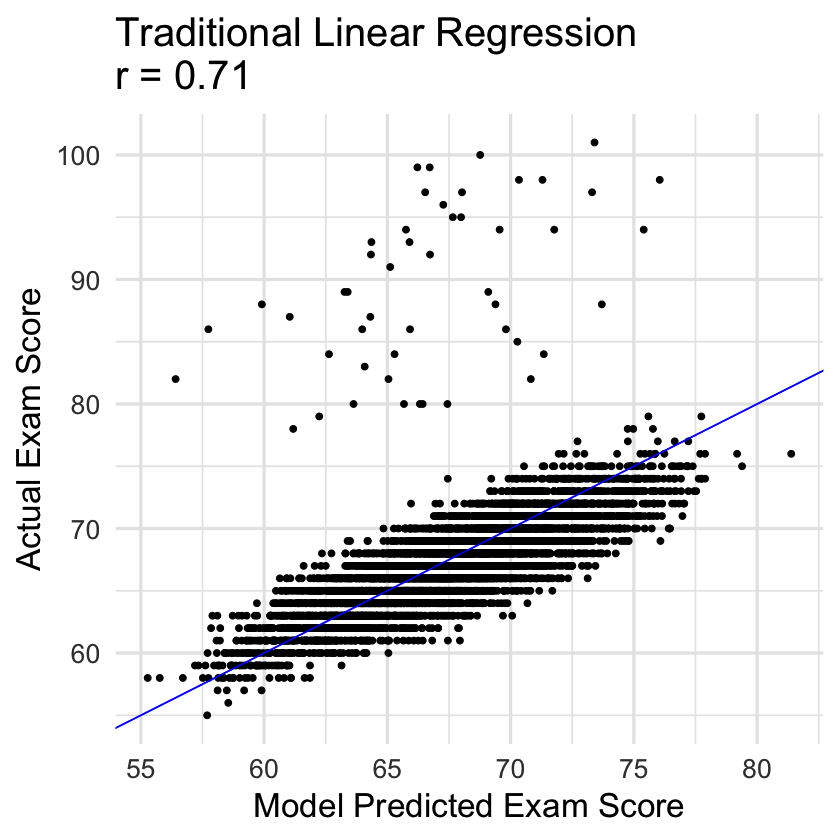

In [14]:
grid::grid.raster(magick::image_read("plot3.png"), width = grid::unit(1, "npc"), height = grid::unit(1, "npc"))

2. LASSO regression

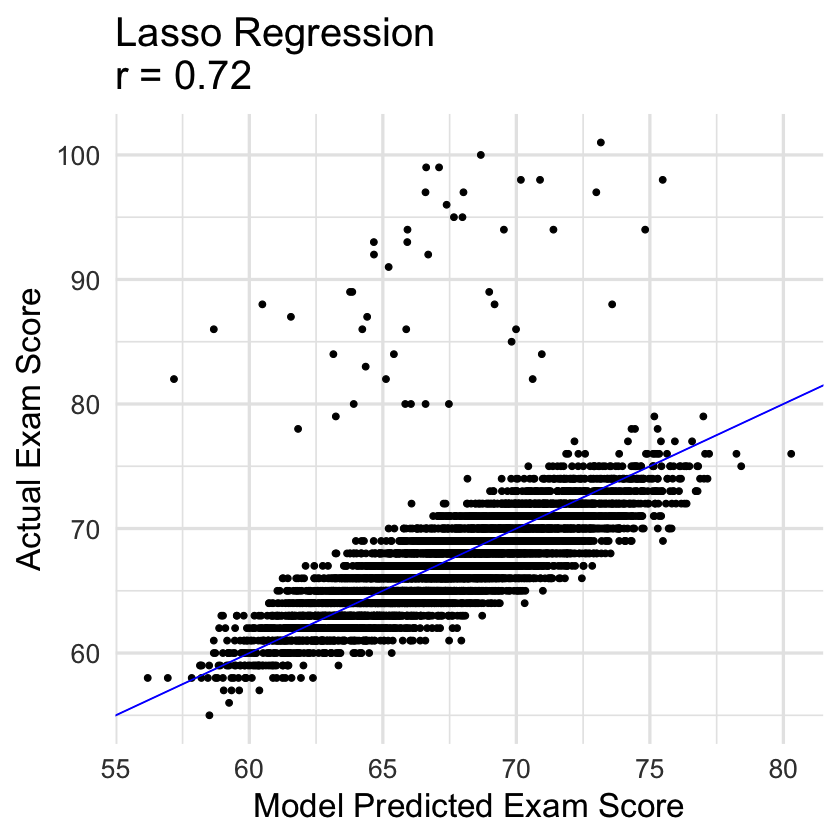

In [16]:
grid::grid.raster(magick::image_read("plot4.png"), width = grid::unit(1, "npc"), height = grid::unit(1, "npc"))

3. Ridge regression

Note that since multicollinearity is not a problem, OLS and ridge performs quite similarly to each otther. Note that ridge regression has an advantage in presence of multicollinearity.

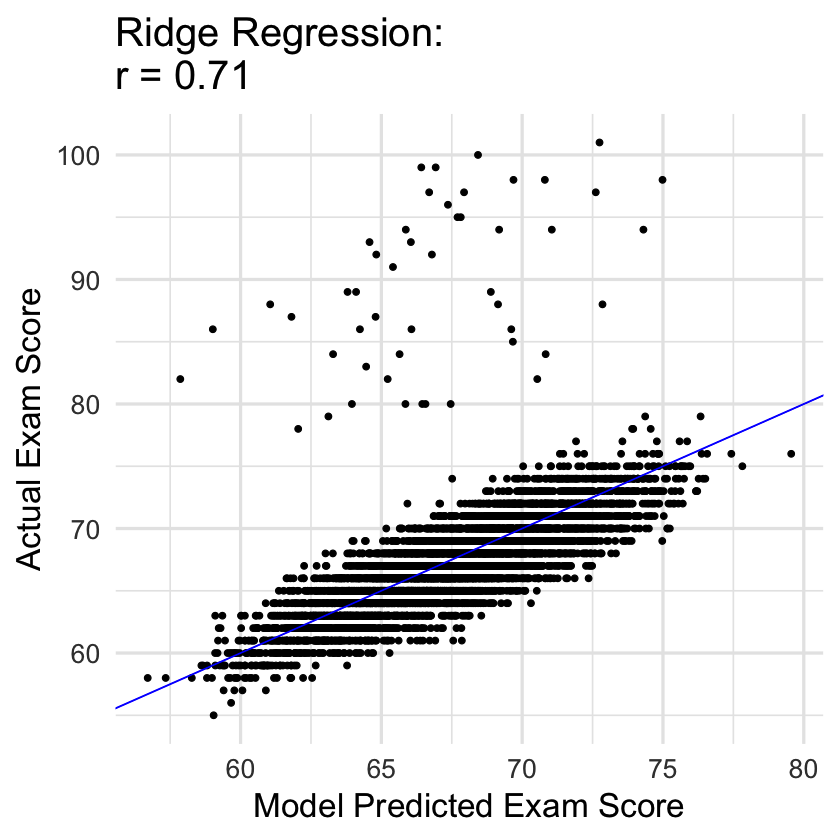

In [17]:
grid::grid.raster(magick::image_read("plot5.png"), width = grid::unit(1, "npc"), height = grid::unit(1, "npc"))

#### Bayesian Approach

1. LASSO regression

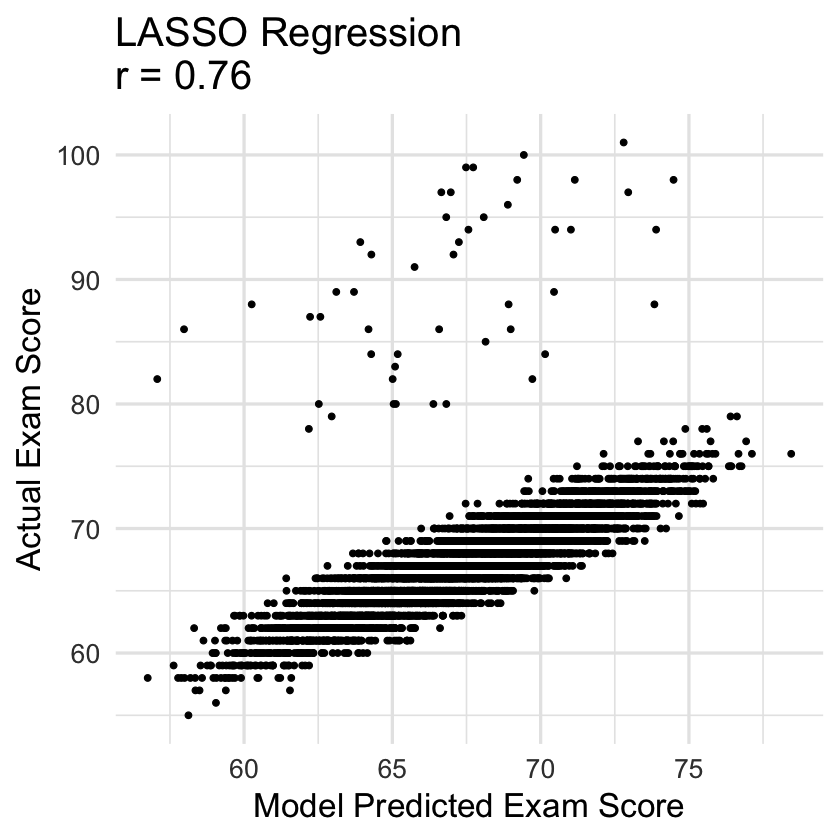

In [19]:
grid::grid.raster(magick::image_read("plot6.png"), width = grid::unit(1, "npc"), height = grid::unit(1, "npc"))

2. Ridge regression


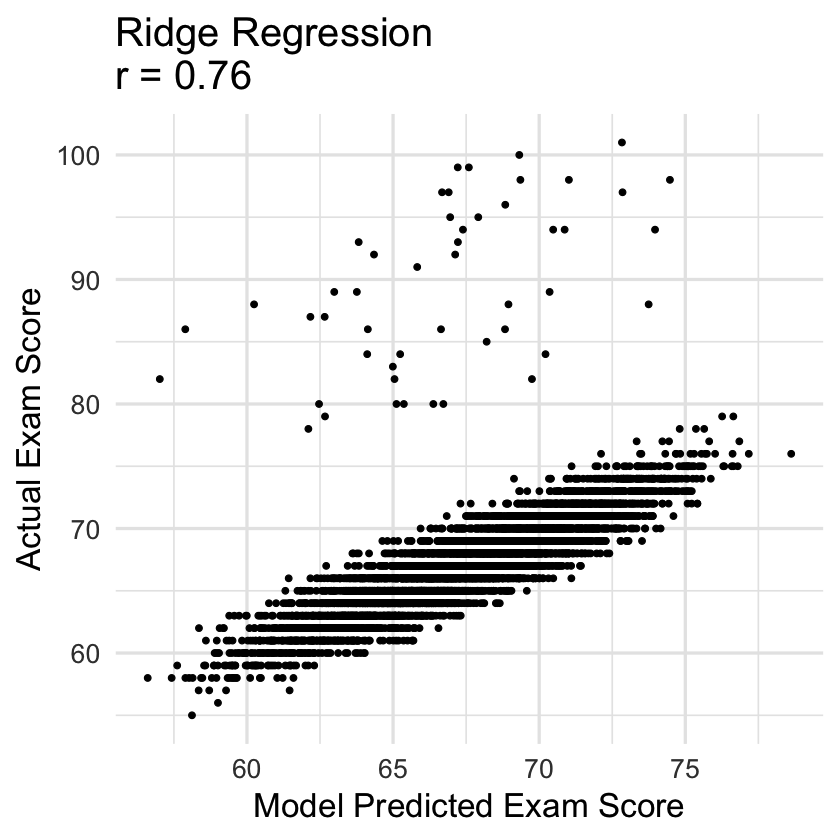

In [20]:
grid::grid.raster(magick::image_read("plot7.png"), width = grid::unit(1, "npc"), height = grid::unit(1, "npc"))

### Diagnostics
I compare the performance between the two Bayesian models with regularizers (LASSO and Ridge). The results match with the prediction model: both models perform roughly equally well compared to each other as the difference Expected Log Pointwise Predictive Density LOO is insignificant. Pareto-k diagnostics also show 1 bad point out of 68, and the rest being under 0.7. According to https://mc-stan.org/loo/reference/pareto-k-diagnostic.html, this indicates that the estimates for both models are relatively reliable (there's one bad point that could be due to chance).

| Model   | elpd_diff | se_diff | elpd_loo | se_elpd_loo | p_loo   | se_p_loo | looic   | se_looic |
|---------|-----------|---------|----------|--------------|---------|-----------|---------|-----------|
| LASSO  | 0.000   | 0.000  | -41.362 | 12.343      | 16.957 | 3.052    | 82.725 | 24.685   |
| Ridge  | -0.238   | 0.807  | -41.601 | 12.757     | 17.467 | 3.551    | 83.202 | 25.515   |


### Model Comparison

While the project concerns about the equivalency of regularizers performance between frequentist and Bayesian paradigm, note that there are cases where Bayesian models work better compared to frequentist as shown above. Both Bayesian regularized model shows a 4-5% increase in prediction score. Using a student-t distribution with a gamma distribution on the parameter d.o.f nu. I have also tested Bayesian with a normal distribution on training data, which shows similar result compared to frequentist paradigm. Another reason why this model works better than frequentist is due to limited data constraint (I used 0.01 for partitioning meaning ~66 samples are used for training data). As the partioning ratio goes up (more training data), the data starts to dominate the prior, so the performance will be gradually more similar.

However, a tradeoff is that frequentist is less computationally intensive compared to bayesian approach as above and will roughly produce a similar performance with enough training data. Another issue to notice is that the performance gap is not very high since the dataset doesn't show a lot of collinearity among the predictors so the project cannot capture the benefits of regularizers in a more apparent difference. It's possible to replicate this project findings onto the dataset proposed by the article https://haines-lab.com/post/on-the-equivalency-between-the-lasso-ridge-regression-and-specific-bayesian-priors/ or any other datasets that have a moderate amount of outliers.

The posterior distribution can be useful in estimating students' performance before the final exam period. For most cases, the explanatory variables data is not hard to gather since a lot of these information are generally disclosed to the school. For example, disabilities information are gathered to consider students' eligibility for concession, parents and family background are gathered for emergency contacts, scholarship eligibility, etc. In a small classroom setting, this information can be useful in identifying students with possible low performances in which teachers can utilize to support their learning or figure out some of the reasons that may be causing such prediction. 

### Conclusion

While frequentist and Bayesian regression model generally perform similarly, in certain scenarios, especially in case of limited data, Bayesian model can outperform with a good chosen prior. While it shows that using Laplace or Normal prior can achieve equivalent performance wih frequentist regularized model, it's possible to extend the Bayesian model to perform better by adding additional priors along with different choices of distribution for likelihood.

#### References

https://paulbuerkner.com/brms/reference/set_prior.html

https://haines-lab.com/post/on-the-equivalency-between-the-lasso-ridge-regression-and-specific-bayesian-priors/

https://mc-stan.org/loo/reference/pareto-k-diagnostic.html

#### Appendix

All R codes can be found in code.R

Stan code (relatively simillar implementation with difference in choice in prior distribution for regularizer):

lasso.stan:
```
data {
  int<lower=0> N_train;
  int<lower=0> N_test;
  int<lower=0> N_pred;
  vector[N_train] y_train;
  matrix[N_train, N_pred] X_train;
  matrix[N_test, N_pred] X_test;
}
parameters {
  real<lower=0> sigma;
  real<lower=0> sigma_B;
  vector[N_pred] beta;
  real<lower=2> nu;
}
model {
  sigma_B ~ normal(0,1);
  sigma ~ normal(0, 1);
  beta ~ double_exponential(0, sigma_B);
  nu ~ gamma(2, 0.1);
  y_train ~ student_t(nu, X_train * beta, sigma);
}
generated quantities {
  array[N_test] real y_test;
  for (i in 1:N_test) {
    y_test[i] = student_t_rng(nu, X_test[i] * beta, sigma);
  }
}
```

ridge.stan:
```
data {
  int<lower=0> N_train;
  int<lower=0> N_test;
  int<lower=0> N_pred;
  vector[N_train] y_train;
  matrix[N_train, N_pred] X_train;
  matrix[N_test, N_pred] X_test;
}
parameters {
  real<lower=0> sigma;
  real<lower=0> sigma_B;
  vector[N_pred] beta;
  real<lower=2> nu;
}
model {
  sigma ~ normal(0, 1);
  sigma_B ~ cauchy(0, 1);
  beta ~ normal(0, sigma_B);
  nu ~ gamma(2, 0.1);
  y_train ~ student_t(nu, X_train * beta, sigma);
}
generated quantities {
  array[N_test] real y_test;
  for (i in 1:N_test) {
    y_test[i] = student_t_rng(nu, X_test[i] * beta, sigma);
  }
}
```